In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import math
class BacktestingMySelf:
    def __init__(self, csvFileName, startMoney):
        self.startMoney = startMoney
        self.data = pd.read_csv(csvFileName)
        self.isInPosition = False
        self.id = 1
        self.stopLoss = 0.25
        self.takeProfit = 0.37
        self.entryPositionPrice = 0
        self.exitPositionPrice = 0
        self.positionCount = 0
        self.startMoneyTime = []
        self.takeProfitCount = 0
        self.stopLossCount = 0
        self.positionWithProfitCount = 0
        self.positionWithLossCount = 0
        #self.database = Database.Database.getInstance()

    @staticmethod
    def FloorPrecisionFix(amount, precision: int):
        return math.floor(amount * 10 ** precision) / 10 ** precision

    def createTest(self):
        for i, inside in self.data.iterrows():
            # if user in position
            if self.isInPosition:
                if (inside['MACDHIST'] < 0 and inside['MACDHIST2'] < inside['MACDHIST1']
                    and inside['MACDHIST1'] > inside['MACDHIST']) or (
                        inside['MACDHIST'] > 0 and inside['MACDHIST1'] > inside['MACDHIST']):
                    self.positionCount += 1
                    self.startMoney *= self.FloorPrecisionFix(inside['Close'] / self.entryPositionPrice, 4)
                    self.isInPosition = False
                    inside['Reason'] = 'MACDR'
                    inside['SIDE'] = 'Exit'
                    inside['StartMoney'] = self.startMoney
                    self.startMoneyTime.append(self.startMoney)
                    # self.database.CreateNewSpotLog(inside)
                    if self.entryPositionPrice < inside['Close']:
                        self.positionWithProfitCount += 1
                    elif self.entryPositionPrice > inside['Close']:
                        self.positionWithLossCount += 1
                    continue
                elif inside['SUPERTd_10_3'] == -1.0:
                    self.positionCount += 1
                    self.startMoney *= self.FloorPrecisionFix(inside['Close'] / self.entryPositionPrice, 4)
                    self.isInPosition = False
                    inside['Reason'] = 'SuperTrendExit'
                    inside['SIDE'] = 'Exit'
                    inside['StartMoney'] = self.startMoney
                    self.startMoneyTime.append(self.startMoney)
                    # self.database.CreateNewSpotLog(inside)
                    if self.entryPositionPrice < inside['Close']:
                        self.positionWithProfitCount += 1
                    elif self.entryPositionPrice > inside['Close']:
                        self.positionWithLossCount += 1
                    continue
                elif inside['High'] > self.entryPositionPrice + ((self.entryPositionPrice / 100) * self.takeProfit):
                    exitPrice = self.entryPositionPrice + ((self.entryPositionPrice / 100) * self.takeProfit)
                    self.positionCount += 1
                    self.startMoney *= self.FloorPrecisionFix(exitPrice / self.entryPositionPrice, 4)
                    self.isInPosition = False
                    inside['SIDE'] = 'Exit'
                    inside['StartMoney'] = self.startMoney
                    # self.database.CreateNewSpotLog(inside)
                    self.startMoneyTime.append(self.startMoney)
                    inside['Reason'] = 'TP'
                    inside['Close'] = exitPrice
                    self.takeProfitCount += 1
                    self.positionWithProfitCount += 1
                    continue
                elif inside['Low'] < self.entryPositionPrice - ((self.entryPositionPrice / 100) * self.stopLoss):
                    exitPrice = self.entryPositionPrice - ((self.entryPositionPrice / 100) * self.stopLoss)
                    self.positionCount += 1
                    self.startMoney *= self.FloorPrecisionFix(exitPrice / self.entryPositionPrice, 4)
                    self.isInPosition = False
                    inside['SIDE'] = 'Exit'
                    inside['StartMoney'] = self.startMoney
                    # self.database.CreateNewSpotLog(inside)
                    self.startMoneyTime.append(self.startMoney)
                    inside['Reason'] = 'SL'
                    inside['Close'] = exitPrice
                    self.stopLossCount += 1
                    self.positionWithLossCount += 1
                    continue
            else:
                # if user is not in position
                if inside['SUPERTd_10_3'] == 1.0:
                    if (inside['MACDHIST'] >= 0 and inside['MACDHIST2'] > inside['MACDHIST1']
                        and inside['MACDHIST1'] < inside['MACDHIST']) or (
                            inside['MACDHIST'] < 0 and inside['MACDHIST1'] < inside['MACDHIST']):
                        self.entryPositionPrice = inside['Close']
                        self.isInPosition = True
                        self.positionCount += 1
                        inside['SIDE'] = 'Enter'
                        inside['StartMoney'] = self.startMoney
                        inside['Reason'] = 'Enter'
                        # self.database.CreateNewSpotLog(inside)
        print('{0:.10f}'.format(self.startMoney))
        print(self.positionCount)

    def getPositions(self):
        return self.positions

In [10]:
bt = BacktestingMySelf("1MinuteData.csv", 10000)

In [11]:
bt.createTest()

2306.2364505344
65767


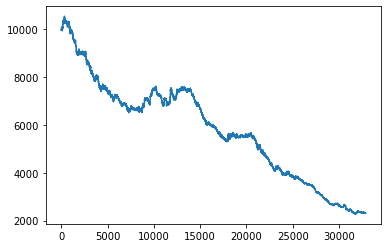

In [12]:
plt.plot(bt.startMoneyTime)

In [13]:
bt.takeProfitCount / (bt.positionWithProfitCount + bt.positionWithLossCount)

0.06996072700703261

In [14]:
# 6 Per cent of trades are Take Profit

In [15]:
bt.stopLossCount / (bt.positionWithProfitCount + bt.positionWithLossCount)

0.0033184156848418424

In [17]:
# 0.3 Per cent of trades are Stop Loss 

In [18]:
bt.positionWithProfitCount / (bt.positionWithProfitCount + bt.positionWithLossCount)

0.34745943312935734

In [19]:
# 34 per cent of trades are profitable

In [20]:
bt.positionWithLossCount / (bt.positionWithProfitCount + bt.positionWithLossCount)

0.6525405668706427

In [21]:
# 65 per cent of trades are not profitable

In [22]:
len(bt.data)

525604

In [23]:
# I did this test for 525604 row. 
# This test was done for 1 minute candles.
# There are 1440 candles on a daily basis.

In [24]:
len(bt.data) / 1440

365.0027777777778

In [25]:
# I have tested for exactly 1 year.